# Hyperparameter Tuning - Dropout

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adagrad
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from numpy import asarray
from sklearn.metrics import mean_absolute_error

In [2]:
"""
Resource 1
"""
def create_model(n, optimizer, dropout_rate):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(n,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='relu'))
    
    model.compile(loss='mse', optimizer = optimizer, metrics=['mae'])
    
    return model

### Splitting the Data - from feature selection model mutual_info_regression

In [3]:
y = pd.read_csv('y.csv')
x2_mutualinforegression = pd.read_csv('x2_mutualinforegression.csv')
n = len(x2_mutualinforegression.columns)
X_train, X_test, y_train, y_test = train_test_split(x2_mutualinforegression, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, n

((728, 16), (182, 16), 16)

### Optimizer

In [11]:
optimizer = Adagrad(learning_rate = 0.1)

### Batch size

In [12]:
batch_size = 1

## Dropout
0.1, 0.2, 0.3, 0.4

### Dropout = 0.1

In [4]:
"""
Resource 2
"""
dropout_rate = 0.1
model_optimizer1 = create_model(n, optimizer, dropout_rate)

history_optimizer1 = model_optimizer1.fit(X_train, y_train,
                                          validation_split = 0.2,
                                          epochs=200,
                                          batch_size=batch_size,
                                          verbose=1,
                                         )

Epoch 1/200
582/582 [==============================] - 1s 2ms/step - loss: 281.3909 - mae: 4.1500 - val_loss: 2439.7761 - val_mae: 12.1973
Epoch 2/200
582/582 [==============================] - 1s 1ms/step - loss: 533.7046 - mae: 4.9417 - val_loss: 402.2704 - val_mae: 5.1641
Epoch 3/200
582/582 [==============================] - 1s 951us/step - loss: 315.8028 - mae: 3.8307 - val_loss: 261.5536 - val_mae: 4.8088
Epoch 4/200
582/582 [==============================] - 1s 954us/step - loss: 182.6197 - mae: 3.4781 - val_loss: 134.3033 - val_mae: 3.1254
Epoch 5/200
582/582 [==============================] - 1s 919us/step - loss: 147.6427 - mae: 3.2938 - val_loss: 462.4018 - val_mae: 5.8401
Epoch 6/200
582/582 [==============================] - 1s 918us/step - loss: 110.0795 - mae: 3.0361 - val_loss: 389.1620 - val_mae: 5.1573
Epoch 7/200
582/582 [==============================] - 1s 938us/step - loss: 172.3607 - mae: 3.1097 - val_loss: 111.2366 - val_mae: 2.8275
Epoch 8/200
582/582 [========

Epoch 120/200
582/582 [==============================] - 1s 1ms/step - loss: 20.9069 - mae: 1.2735 - val_loss: 202.1847 - val_mae: 3.3629
Epoch 121/200
582/582 [==============================] - 1s 1ms/step - loss: 12.6863 - mae: 1.1078 - val_loss: 185.9762 - val_mae: 3.2364
Epoch 122/200
582/582 [==============================] - 1s 1ms/step - loss: 10.6478 - mae: 1.1063 - val_loss: 189.6082 - val_mae: 3.2602
Epoch 123/200
582/582 [==============================] - 1s 1ms/step - loss: 14.9065 - mae: 1.2051 - val_loss: 176.0762 - val_mae: 3.1599
Epoch 124/200
582/582 [==============================] - 1s 1ms/step - loss: 17.0391 - mae: 1.2588 - val_loss: 196.1616 - val_mae: 3.3172
Epoch 125/200
582/582 [==============================] - 1s 1ms/step - loss: 11.3133 - mae: 1.1225 - val_loss: 212.4755 - val_mae: 3.4435
Epoch 126/200
582/582 [==============================] - 1s 1ms/step - loss: 33.2860 - mae: 1.3121 - val_loss: 156.4102 - val_mae: 2.9366
Epoch 127/200
582/582 [===========

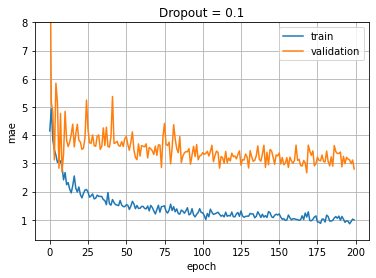

6/6 [==============================] - 0s 1ms/step - loss: 71.2494 - mae: 2.2051


[71.2493896484375, 2.205101490020752]

In [5]:
plt.plot(history_optimizer1.history['mae'])
plt.plot(history_optimizer1.history['val_mae'])
plt.title('Dropout = 0.1')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_optimizer1 = model_optimizer1.evaluate(X_test, y_test, verbose=1)
score_optimizer1

### Dropout = 0.2

In [6]:
"""
Resource 2
"""
dropout_rate2 = 0.2
model_optimizer2 = create_model(n, optimizer, dropout_rate2)

history_optimizer2 = model_optimizer2.fit(X_train,
                                          y_train,
                                          validation_split = 0.2,
                                          epochs=200,
                                          batch_size=batch_size,
                                          verbose=1
                                         )

Epoch 1/200
582/582 [==============================] - 1s 1ms/step - loss: 921.3696 - mae: 6.2722 - val_loss: 846.3331 - val_mae: 7.8029
Epoch 2/200
582/582 [==============================] - 1s 981us/step - loss: 921.3699 - mae: 6.2722 - val_loss: 846.3331 - val_mae: 7.8029
Epoch 3/200
582/582 [==============================] - 1s 931us/step - loss: 921.3696 - mae: 6.2722 - val_loss: 846.3331 - val_mae: 7.8029
Epoch 4/200
582/582 [==============================] - 1s 975us/step - loss: 921.3694 - mae: 6.2722 - val_loss: 846.3331 - val_mae: 7.8029
Epoch 5/200
582/582 [==============================] - 1s 932us/step - loss: 921.3699 - mae: 6.2722 - val_loss: 846.3331 - val_mae: 7.8029
Epoch 6/200
582/582 [==============================] - 1s 940us/step - loss: 686.2334 - mae: 5.2089 - val_loss: 368.7550 - val_mae: 5.8244
Epoch 7/200
582/582 [==============================] - 1s 938us/step - loss: 594.0228 - mae: 5.1158 - val_loss: 693.4263 - val_mae: 7.3201
Epoch 8/200
582/582 [========

Epoch 120/200
582/582 [==============================] - 1s 1ms/step - loss: 14.0278 - mae: 1.2002 - val_loss: 122.5156 - val_mae: 2.6306
Epoch 121/200
582/582 [==============================] - 1s 1ms/step - loss: 21.9190 - mae: 1.2249 - val_loss: 168.5378 - val_mae: 3.1480
Epoch 122/200
582/582 [==============================] - 1s 1ms/step - loss: 34.0238 - mae: 1.5002 - val_loss: 158.0146 - val_mae: 3.0957
Epoch 123/200
582/582 [==============================] - 1s 1ms/step - loss: 16.4148 - mae: 1.3413 - val_loss: 152.5561 - val_mae: 3.0086
Epoch 124/200
582/582 [==============================] - 1s 1ms/step - loss: 25.3883 - mae: 1.3751 - val_loss: 152.4263 - val_mae: 3.0472
Epoch 125/200
582/582 [==============================] - 1s 1ms/step - loss: 21.2328 - mae: 1.3223 - val_loss: 254.8256 - val_mae: 3.7565
Epoch 126/200
582/582 [==============================] - 1s 1ms/step - loss: 25.2418 - mae: 1.3518 - val_loss: 169.3993 - val_mae: 3.1558
Epoch 127/200
582/582 [===========

Epoch 179/200
582/582 [==============================] - 1s 1ms/step - loss: 12.5452 - mae: 1.0596 - val_loss: 183.9032 - val_mae: 3.1995
Epoch 180/200
582/582 [==============================] - 1s 1ms/step - loss: 10.5501 - mae: 1.1331 - val_loss: 197.4227 - val_mae: 3.3141
Epoch 181/200
582/582 [==============================] - 1s 1ms/step - loss: 39.6685 - mae: 1.3076 - val_loss: 204.2034 - val_mae: 3.3783
Epoch 182/200
582/582 [==============================] - 1s 1ms/step - loss: 11.3437 - mae: 1.0746 - val_loss: 184.1222 - val_mae: 3.1940
Epoch 183/200
582/582 [==============================] - 1s 985us/step - loss: 12.2777 - mae: 1.0805 - val_loss: 160.9485 - val_mae: 2.9763
Epoch 184/200
582/582 [==============================] - 1s 975us/step - loss: 20.5917 - mae: 1.1530 - val_loss: 192.6681 - val_mae: 3.3324
Epoch 185/200
582/582 [==============================] - 1s 961us/step - loss: 13.2737 - mae: 1.1342 - val_loss: 191.7343 - val_mae: 3.3290
Epoch 186/200
582/582 [=====

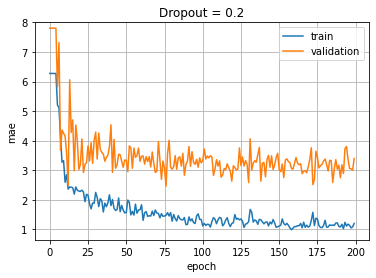

6/6 [==============================] - 0s 1ms/step - loss: 40.4179 - mae: 1.9432


[40.417850494384766, 1.9431902170181274]

In [7]:
"""
Resource 3
"""
plt.plot(history_optimizer2.history['mae'])
plt.plot(history_optimizer2.history['val_mae'])
plt.title('Dropout = 0.2')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_optimizer2 = model_optimizer2.evaluate(X_test, y_test, verbose=1)
score_optimizer2

### Dropout = 0.3

In [8]:
"""
Resource 2
"""
dropout_rate3 = 0.3
model_optimizer3 = create_model(n, optimizer, dropout_rate3)

history_optimizer3 = model_optimizer3.fit(X_train,
                                          y_train,
                                          validation_split = 0.2,
                                          epochs=200,
                                          batch_size=batch_size,
                                          verbose=1)

Epoch 1/200
582/582 [==============================] - 1s 1ms/step - loss: 580.2011 - mae: 5.0061 - val_loss: 1459.6195 - val_mae: 8.9011
Epoch 2/200
582/582 [==============================] - 1s 936us/step - loss: 145.4135 - mae: 3.4845 - val_loss: 126.5375 - val_mae: 3.2273
Epoch 3/200
582/582 [==============================] - 1s 974us/step - loss: 404.0574 - mae: 3.7821 - val_loss: 185.0964 - val_mae: 3.8126
Epoch 4/200
582/582 [==============================] - 1s 880us/step - loss: 264.7043 - mae: 3.4175 - val_loss: 117.6121 - val_mae: 2.8992
Epoch 5/200
582/582 [==============================] - 1s 938us/step - loss: 188.8999 - mae: 2.9401 - val_loss: 362.7325 - val_mae: 4.5029
Epoch 6/200
582/582 [==============================] - 1s 1ms/step - loss: 166.6504 - mae: 2.8875 - val_loss: 188.4900 - val_mae: 3.4544
Epoch 7/200
582/582 [==============================] - 1s 867us/step - loss: 90.3767 - mae: 2.4207 - val_loss: 181.9611 - val_mae: 3.3337
Epoch 8/200
582/582 [==========

Epoch 120/200
582/582 [==============================] - 1s 1ms/step - loss: 23.6695 - mae: 1.4253 - val_loss: 183.7762 - val_mae: 3.3715
Epoch 121/200
582/582 [==============================] - 1s 1ms/step - loss: 27.0977 - mae: 1.4649 - val_loss: 156.0661 - val_mae: 3.2120
Epoch 122/200
582/582 [==============================] - 1s 1ms/step - loss: 23.5236 - mae: 1.4244 - val_loss: 201.8362 - val_mae: 3.4446
Epoch 123/200
582/582 [==============================] - 1s 1ms/step - loss: 25.4613 - mae: 1.4550 - val_loss: 204.8939 - val_mae: 3.5276
Epoch 124/200
582/582 [==============================] - 1s 1ms/step - loss: 51.6205 - mae: 1.7363 - val_loss: 323.2733 - val_mae: 4.1273
Epoch 125/200
582/582 [==============================] - 1s 1ms/step - loss: 31.3716 - mae: 1.4751 - val_loss: 153.9086 - val_mae: 3.1726
Epoch 126/200
582/582 [==============================] - 1s 1ms/step - loss: 15.9959 - mae: 1.2393 - val_loss: 150.6091 - val_mae: 3.1916
Epoch 127/200
582/582 [===========

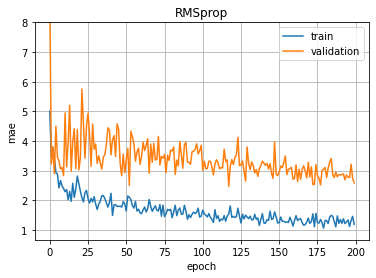

6/6 [==============================] - 0s 2ms/step - loss: 73.6734 - mae: 2.1655


[73.67340087890625, 2.165484666824341]

In [9]:
"""
Resource 3
"""
plt.plot(history_optimizer3.history['mae'])
plt.plot(history_optimizer3.history['val_mae'])
plt.title('RMSprop')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_optimizer3 = model_optimizer3.evaluate(X_test, y_test, verbose=1)
score_optimizer3

### Dropout = 0.4

In [13]:
"""
Resource 2
"""
dropout_rate4 = 0.4
model_optimizer4 = create_model(n, optimizer, dropout_rate4)

history_optimizer4 = model_optimizer4.fit(X_train,
                                          y_train,
                                          validation_split = 0.2,
                                          epochs=200,
                                          batch_size=batch_size,
                                          verbose=1
                                         )

Epoch 1/200
582/582 [==============================] - 1s 1ms/step - loss: 757.8414 - mae: 5.5867 - val_loss: 200.6678 - val_mae: 4.0105
Epoch 2/200
582/582 [==============================] - 1s 910us/step - loss: 766.7096 - mae: 5.0940 - val_loss: 221.1452 - val_mae: 3.4533
Epoch 3/200
582/582 [==============================] - 0s 850us/step - loss: 198.6669 - mae: 3.0235 - val_loss: 399.1579 - val_mae: 5.4937
Epoch 4/200
582/582 [==============================] - 1s 910us/step - loss: 202.2629 - mae: 3.4932 - val_loss: 300.5563 - val_mae: 4.7995
Epoch 5/200
582/582 [==============================] - 1s 948us/step - loss: 280.2619 - mae: 3.6006 - val_loss: 201.8441 - val_mae: 3.9249
Epoch 6/200
582/582 [==============================] - 1s 1ms/step - loss: 149.4560 - mae: 3.0129 - val_loss: 190.1016 - val_mae: 3.8879
Epoch 7/200
582/582 [==============================] - 1s 900us/step - loss: 109.5682 - mae: 2.6725 - val_loss: 193.7531 - val_mae: 3.9211
Epoch 8/200
582/582 [==========

Epoch 120/200
582/582 [==============================] - 1s 1ms/step - loss: 27.0028 - mae: 1.5740 - val_loss: 146.6516 - val_mae: 3.1560
Epoch 121/200
582/582 [==============================] - 1s 1ms/step - loss: 55.8699 - mae: 1.7487 - val_loss: 175.2291 - val_mae: 3.4125
Epoch 122/200
582/582 [==============================] - 1s 1ms/step - loss: 35.7324 - mae: 1.5987 - val_loss: 221.3510 - val_mae: 3.6600
Epoch 123/200
582/582 [==============================] - 1s 1ms/step - loss: 27.9653 - mae: 1.3838 - val_loss: 300.2632 - val_mae: 3.9458
Epoch 124/200
582/582 [==============================] - 1s 1ms/step - loss: 62.7761 - mae: 1.6716 - val_loss: 115.7270 - val_mae: 2.8941
Epoch 125/200
582/582 [==============================] - 1s 1ms/step - loss: 35.4535 - mae: 1.5469 - val_loss: 173.6680 - val_mae: 3.3758
Epoch 126/200
582/582 [==============================] - 1s 1ms/step - loss: 23.6953 - mae: 1.4832 - val_loss: 216.9078 - val_mae: 3.6067
Epoch 127/200
582/582 [===========

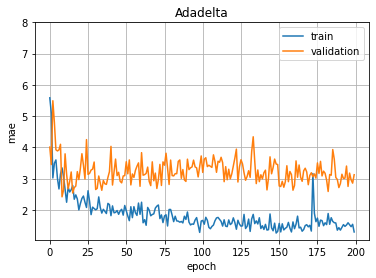

6/6 [==============================] - 0s 1ms/step - loss: 47.3070 - mae: 2.0949


[47.30702209472656, 2.0948901176452637]

In [14]:
"""
Resource 3
"""
plt.plot(history_optimizer4.history['mae'])
plt.plot(history_optimizer4.history['val_mae'])
plt.title('Adadelta')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_optimizer4 = model_optimizer4.evaluate(X_test, y_test, verbose=1)
score_optimizer4

### Comparison

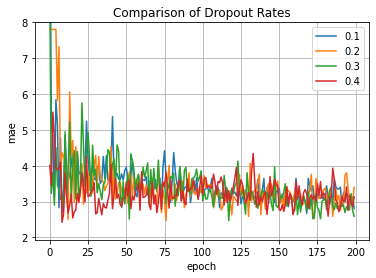

0.1 2.205101490020752
0.2 1.9431902170181274
0.3 2.165484666824341
0.4 2.0948901176452637


In [15]:
plt.plot(history_optimizer1.history['val_mae'])
plt.plot(history_optimizer2.history['val_mae'])
plt.plot(history_optimizer3.history['val_mae'])
plt.plot(history_optimizer4.history['val_mae'])

plt.title('Comparison of Dropout Rates')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['0.1', '0.2', '0.3', '0.4'], loc='upper right')
plt.ylim(top = 8)
plt.grid()
plt.show()

print('0.1', score_optimizer1[1])
print('0.2', score_optimizer2[1])
print('0.3', score_optimizer3[1])
print('0.4', score_optimizer4[1])

Resources:
1. Keras Sequential model: https://keras.io/guides/sequential_model/
2. Train model: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
3. Display model training history: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/